In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D
# from tensorflow.keras.optimizers import Adam
# from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator


In [18]:
train_dir = 'data/train'
val_dir = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [21]:
def create_model():


  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
                ) 
    
  ### END CODE HERE

  return model


In [22]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
449/449 [==============================] - 23s 49ms/step - loss: 0.3664 - accuracy: 0.3354 - val_loss: 0.3345 - val_accuracy: 0.4139
Epoch 2/15
449/449 [==============================] - 22s 50ms/step - loss: 0.3213 - accuracy: 0.4445 - val_loss: 0.3084 - val_accuracy: 0.4622
Epoch 3/15
449/449 [==============================] - 23s 52ms/step - loss: 0.2972 - accuracy: 0.4995 - val_loss: 0.2924 - val_accuracy: 0.5096
Epoch 4/15
449/449 [==============================] - 22s 49ms/step - loss: 0.2807 - accuracy: 0.5360 - val_loss: 0.2885 - val_accuracy: 0.5095
Epoch 5/15
449/449 [==============================] - 22s 50ms/step - loss: 0.2667 - accuracy: 0.5654 - val_loss: 0.2780 - val_accuracy: 0.5319
Epoch 6/15
449/449 [==============================] - 23s 51ms/step - loss: 0.2535 - accuracy: 0.5918 - val_loss: 0.2758 - val_accuracy: 0.5428
Epoch 7/15
449/449 [==============================] - 23s 52ms/step - loss: 0.2391 - accuracy: 0.6228 - val_loss: 0.2754 - val_accuracy:

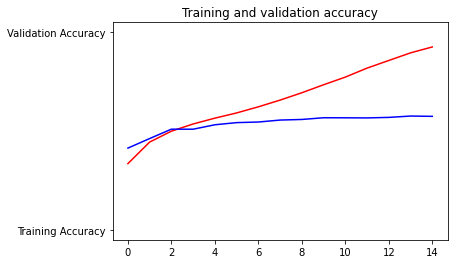

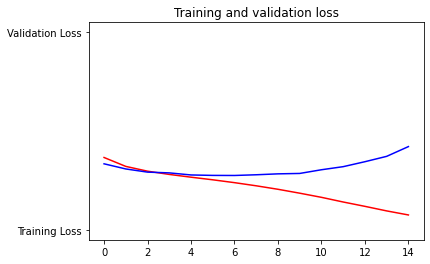

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.show()